In [25]:
#import EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import modeling tools
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
from sklearn.neural_network import MLPClassifier

#import Evaluations tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix

In [2]:
#import dataset
wp=pd.read_csv("water_potability.csv")

wp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#checking some information about our dataset
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [4]:
wp.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Exploratory Data Analysis

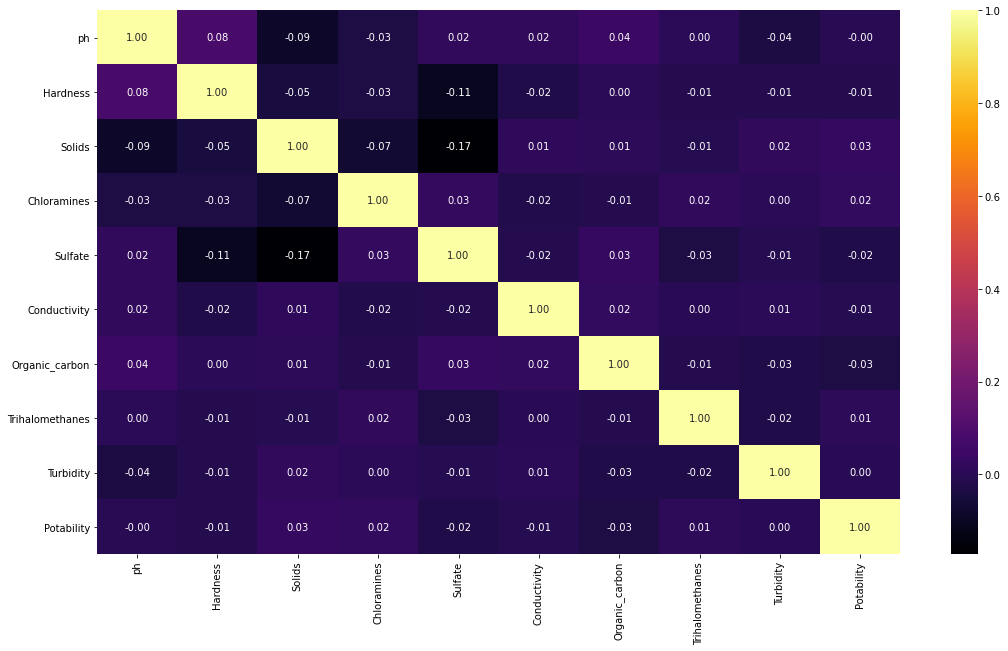

In [5]:
#Corellation Matrix

fig = plt.subplots(figsize=(18,10))

sns.heatmap(wp.corr(),
           annot=True,
           fmt="0.2f",
           cmap="inferno");

* Conclusion : As you see,  there is no important correlation between features.

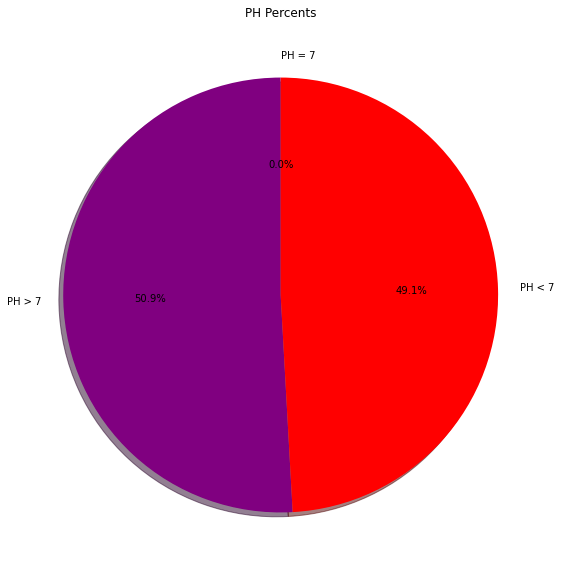

In [6]:
#Creating pie plot for ph lower and higher than 7 and equals to 7.

higher = wp[wp['ph']>7]["ph"]
lower = wp[wp['ph']<7]["ph"]
eq= wp[wp['ph']==7]["ph"]

fig, ax = plt.subplots(figsize=(15,10))
ax.pie([len(higher),len(lower),len(eq)],
       explode=None,
       colors=["purple","red","black"],
       labels=["PH > 7","PH < 7","PH = 7"],
       autopct="%1.1f%%",
       shadow=True,
       startangle=90)

plt.title("PH Percents")
plt.show()

* Conclusion : Probably the amount of acidity and basic water are equal.

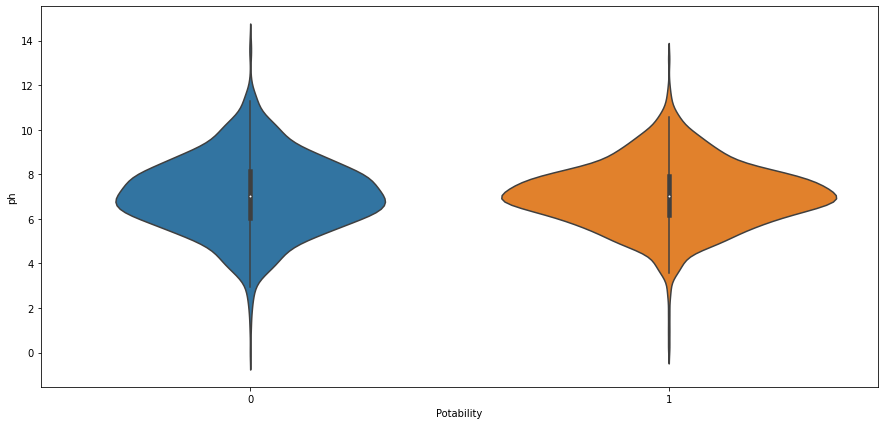

In [7]:
#compare ph and potablity
fig,ax=plt.subplots(figsize=(15,7))

sns.violinplot(x=wp.Potability,
              y=wp.ph,
              data=wp);

* Conclusion : Both potable and non-potable are focused on 6<ph<8

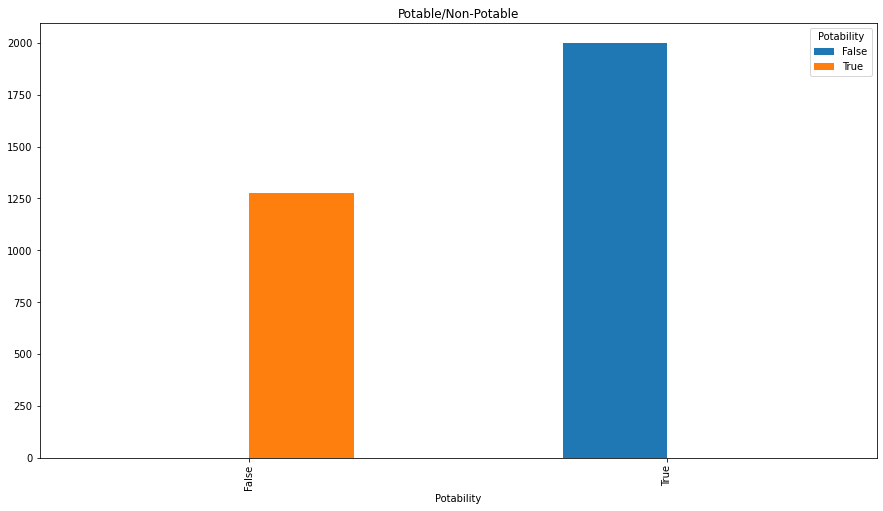

In [8]:
#compare potable and non potable
pd.crosstab(wp.Potability==False,
           wp.Potability==True).plot(kind="bar",
                                    figsize=(15,8),
                                    title="Potable/Non-Potable");

* Conclusion : Potable is greater.

##### As we said before, since there are no important correlation, we want to stop visualing here!

## Managing missing values

In [1]:
wp.isna().sum()

NameError: name 'wp' is not defined

In [10]:
#filling missing values with median
wp['ph'].fillna(wp["ph"].median(), inplace=True)
wp['Sulfate'].fillna(wp["Sulfate"].median(), inplace=True)
wp['Trihalomethanes'].fillna(wp["Trihalomethanes"].median(), inplace=True)

## Spliting Data

In [11]:
#split data into X, y

X= wp.drop("Potability", axis=1)
y=wp["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state =92)

### Now our dataset has been prepared to be trained.
#### We will use:
* RandomForestClassifier
* LogisticRegression
* KNeighborsClassifier (KNN)
* DecisionTreeClassifier
* SupportVectorMachine (svm)

In [69]:
#preparing the models
models={"RandomForestClassifier":RandomForestClassifier(),
       "LogisticRegression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "DecisionTreeClassifier":tree.DecisionTreeClassifier(),
       "svm":svm.SVC()}

In [70]:
#fitting the models and compare their metrics

np.random.seed(42)

scores={}
for name,model in models.items():
    clf=model.fit(X_train,y_train)
    scores[name]=clf.score(X_test,y_test)
    
scores

{'RandomForestClassifier': 0.663109756097561,
 'LogisticRegression': 0.5975609756097561,
 'KNN': 0.5503048780487805,
 'DecisionTreeClassifier': 0.5670731707317073,
 'svm': 0.5975609756097561}

In [28]:
#preparing evaluate_model function

def evaluate_model(model):
    y_pred=model.predict(X_test)
    y_true=y_test
    
    scores={
        "Precision":"{:.2f}".format(precision_score(y_true, y_pred)*100),
        "Recall":"{:.2f}".format(recall_score(y_true, y_pred)*100),
        "f1":"{:.2f}".format(f1_score(y_true, y_pred)*100),
        "Accuracy":"{:.2f}".format(accuracy_score(y_true, y_pred)*100)}
    
    plot_confusion_matrix(model,
                         X_test,
                         y_test)
    
    plot_roc_curve(model,
                  X_test,
                  y_test);
    
    return scores

In [12]:
np.random.seed(42)
model = RandomForestClassifier(n_estimators = 2000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=42)

{'Precision': '69.01', 'Recall': '40.16', 'f1': '50.78', 'Accuracy': '71.04'}

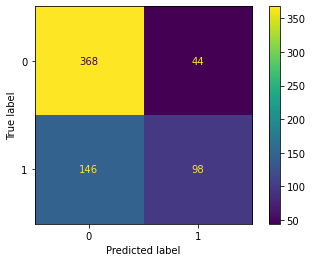

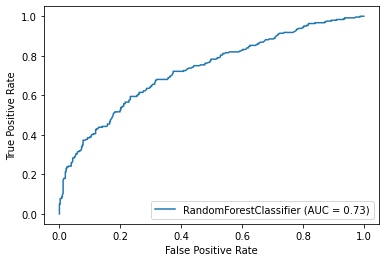

In [29]:
evaluate_model(model)

In [18]:
import pickle
pickle.dump(model,open("RFR_71acc","wb"))